# Hacking COVID-19 

First I imported the raw COVID-19 genome and stored it in a string. Next, I was interested in how much raw information the corona virus contained. To figure that out, I took the genome and encoded it from a string to bytes (encoded via UTF-8 formatting), and it turns out the corona virus contains exactly 29KB of data, uncompressed, which is about the same amount of data as a non formatted written essay. Below you can see the full genome, and the associated file size.

In [1]:
filename = '../input/sars-coronavirus-accession/SARS_CORONAVIRUS_NC_045512_sequence.fasta'

covid_genome = "" 
with open(filename) as f: 
    genome = f.read() 

covid_genome = genome.replace(">NC_045512.2 Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome", "").replace("\n", "")
print(genome)


>NC_045512.2 Wuhan seafood market pneumonia virus isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC
GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT
TCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA
GGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG
TTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG
CCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCAT

In [2]:
b = covid_genome.encode()

print("Corona Virus Uncompressed File Size: " + str(len(b) / 1000) + " KB")

Corona Virus Uncompressed File Size: 29.903 KB


# Transcription and Translation

Next, I performmed both transcription and translation on the genome. To start, I transcribed the genome by replacing the Thymine nucleotides with Uracil, since RNA cannot contain Thymine. Next, I imported a dataset contianing a list of codons and their associated nucleotide sequences. I matched the codon, and then inserted the amino acid single letter identifier into an array. Below you can see the translated genome, and the amino acid sequence.

In [3]:
transcribed_genome = covid_genome.replace('T', 'U')
covid_codons = [transcribed_genome[i:i+3] for i in range(0, len(transcribed_genome), 3)]
print(covid_codons)    

['AUU', 'AAA', 'GGU', 'UUA', 'UAC', 'CUU', 'CCC', 'AGG', 'UAA', 'CAA', 'ACC', 'AAC', 'CAA', 'CUU', 'UCG', 'AUC', 'UCU', 'UGU', 'AGA', 'UCU', 'GUU', 'CUC', 'UAA', 'ACG', 'AAC', 'UUU', 'AAA', 'AUC', 'UGU', 'GUG', 'GCU', 'GUC', 'ACU', 'CGG', 'CUG', 'CAU', 'GCU', 'UAG', 'UGC', 'ACU', 'CAC', 'GCA', 'GUA', 'UAA', 'UUA', 'AUA', 'ACU', 'AAU', 'UAC', 'UGU', 'CGU', 'UGA', 'CAG', 'GAC', 'ACG', 'AGU', 'AAC', 'UCG', 'UCU', 'AUC', 'UUC', 'UGC', 'AGG', 'CUG', 'CUU', 'ACG', 'GUU', 'UCG', 'UCC', 'GUG', 'UUG', 'CAG', 'CCG', 'AUC', 'AUC', 'AGC', 'ACA', 'UCU', 'AGG', 'UUU', 'CGU', 'CCG', 'GGU', 'GUG', 'ACC', 'GAA', 'AGG', 'UAA', 'GAU', 'GGA', 'GAG', 'CCU', 'UGU', 'CCC', 'UGG', 'UUU', 'CAA', 'CGA', 'GAA', 'AAC', 'ACA', 'CGU', 'CCA', 'ACU', 'CAG', 'UUU', 'GCC', 'UGU', 'UUU', 'ACA', 'GGU', 'UCG', 'CGA', 'CGU', 'GCU', 'CGU', 'ACG', 'UGG', 'CUU', 'UGG', 'AGA', 'CUC', 'CGU', 'GGA', 'GGA', 'GGU', 'CUU', 'AUC', 'AGA', 'GGC', 'ACG', 'UCA', 'ACA', 'UCU', 'UAA', 'AGA', 'UGG', 'CAC', 'UUG', 'UGG', 'CUU', 'AGU', 'AGA'

In [4]:
import pandas as pd
df = pd.read_csv('../input/codons/Codons - Sheet1 (1).csv')

amino_acids = []

for codon in covid_codons: 
    try: 
        index = df.index[df['codon'] == codon][0]
        amino_acids.append(df.at[index, 'letter'])
    except: 
        continue 

protien_sequence = ''.join(amino_acids)
print(protien_sequence)

IKGLYLPROQTNQLSISCRSVLOTNFKICVAVTRLHAOCTHAVOLITNYCROQDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTERODGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTSORWHLWLSRSOKRRFASTOTALCVHQTFGCSNCTSWSCYGOAGSRTRRHSVRSOWODTWCPCPSCGRNTSGLPQGSSSOEROORSWWPOLRRRSKVIOLRRRAWHOSLORFSRKLEHOTOQWCYPOTHAOAORRGIHSLCROQLLWPOWLPSOVHORPSSTCWOSFMHFVRTTGLYOHOEGCILLPOTOAONCLVHGTFOKELOIADTFONOIGKEIOHLQWGMSKFCISLKFHNQDYSTKGOKEKAOWLYGONSICLSSCVTKOMQPNVPFNSHEVOSLWONFMADGRFCOSHLRILWHOEFDORRCHYLWLLTPKCCCONLLSSMSQFRSRTOAOSCRIPOOIWLENHSSOGWSHYCLWRLCVLLCWLPOQVCLLGSTCOROHRLOPYRCCWRRFRRSOOQPSONTPKRESQHQYCWOLOTOORDRHYFGIFFCFHKCFCGNCERFGLOSIQTNCOILWOFOSYKRKSOKRCLEYWOTEINTESSLCICIRGCSCCTINFLPHSONCSKFCACFTEGRYNNTRWNFTVFTETHOCYDVHIOFGYOQSSCNGLHYRWCCSVDFAVANOHLWHCLOKTQTRPOLAOREVOGRCRVSORRLGNCOIYLNLCLONCRWTNCHLCKGNOGECSDILOACKOIFGFVCOLYHYWWSOTOSLEFRONICHALKGIVQKVCOIQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENWOFTTIRTTYOOSCOSSIGWYTSLYORAYVARNQRHRKVLCPCTOYDGNKQYLHTQRRCTNKGYFWOOHCDRSARLQECEYHFOTOOKDOOSTOOEVLCLYSOTRYRSKOVRLCCGRCCHKNFATSIOITYTTGHOFROVEYGYILLIOOVW

# Amino Acids Analysis

Next, I analyzed the amino acid sequence. To do so, I once again translated the string of letters into bytes, and evaluated how much information it contained. About 9.9 kilobytes. Finally, I counted the amount of amino acids and plotted them on a nice bar graph for visualization. 

In [5]:
x = protien_sequence.encode() 
print(str(len(x) / 1000) + ' KB')

9.967 KB


In [6]:
unique_acids = [] 
for acid in protien_sequence: 
    if acid not in unique_acids: 
        unique_acids.append(acid)
data = {}
for acid in unique_acids: 
    data[acid] = protien_sequence.count(acid)
df = pd.read_csv('../input/codons/Codons - names.csv')
df.tail()
for letter in data.keys():
    try: 
        index = df.index[df['One Letter Code'] == letter][0]
        val = data[letter]
        new_title = df.at[index, 'name']
        del data[letter]
        data[new_title] = val 
    except: 
        continue 

#remove stop/start codons
del data['K']
del data['O']
    

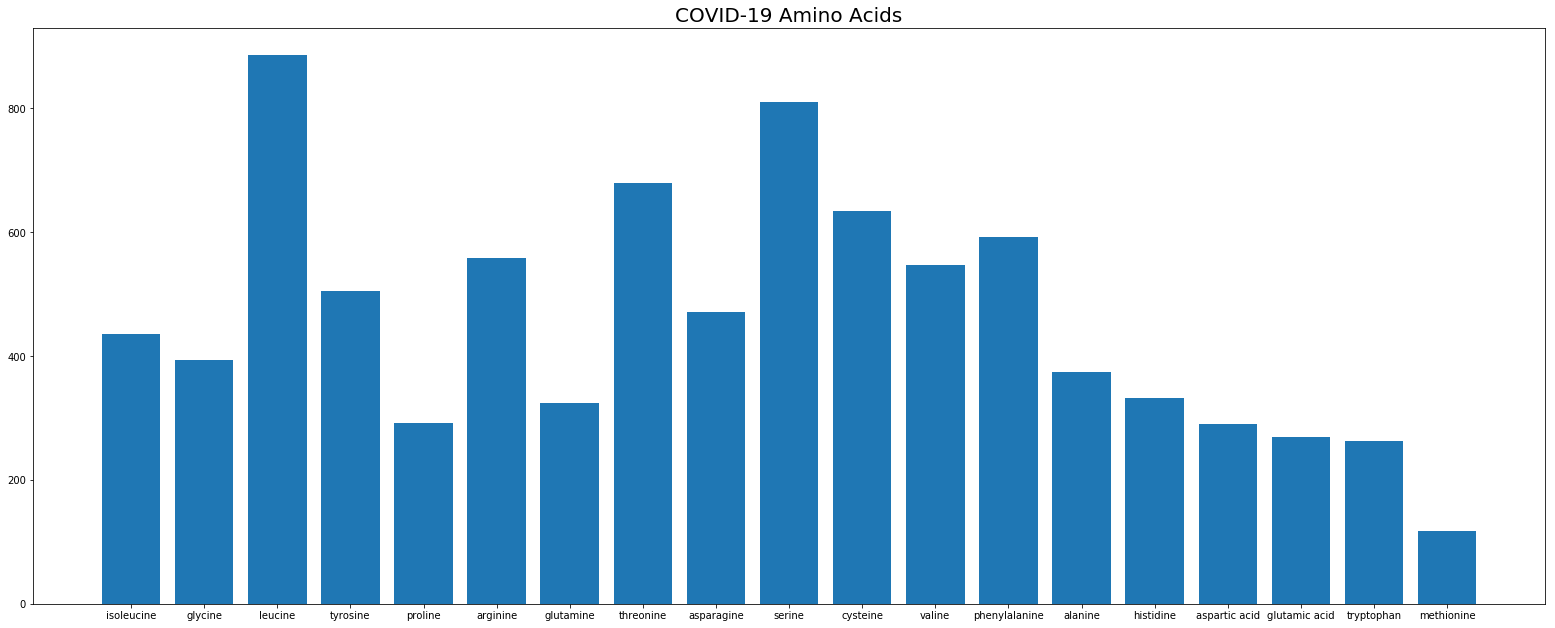

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure() 
ax = fig.add_axes([0 ,1, 3.5, 2])
ax.set_title('COVID-19 Amino Acids', fontsize=20)
ax.bar(data.keys(), data.values())
plt.show()